# Data exploration

To get my data from postgresql into python I saved my data in batches of 50000 from December 1st 2018 to April 31st 2019.
I then imported my data into 10 dataframes and checked their shape to ensure consistency.

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('csv_file/2018-12-01 to 2018-12-16.csv')
df2 = pd.read_csv('csv_file/2018-12-17 to 2018-12-31.csv')
df3 = pd.read_csv('csv_file/2019-01-01 to 2019-01-15.csv')
df4 = pd.read_csv('csv_file/2019-01-16 to 2019-01-31.csv')
df5 = pd.read_csv('csv_file/2019-02-01 to 2019-02-15.csv')
df6 = pd.read_csv('csv_file/2019-02-16 to 2019-02-28.csv')
df7 = pd.read_csv('csv_file/2019-03-01 to 2019-03-15.csv')
df8 = pd.read_csv('csv_file/2019-03-16 to 2019-03-31.csv')
df9 = pd.read_csv('csv_file/2019-04-01 to 2019-04-16.csv')
df10 = pd.read_csv('csv_file/2019-04-17 to 2019-04-31.csv')
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(frames)
#Checking shape of each dataframe
for value in frames:
    print(value.shape)

C:\Users\JDPayne\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(50000, 42)
(50000, 42)
(50000, 42)
(50000, 42)
(50000, 42)
(50000, 42)
(50000, 42)
(50000, 42)
(50000, 42)
(50000, 42)


In [2]:
# Checking shape of final dataframe and printing the head
print(df.shape)
df.head()

(500000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-12-02,UA,UA_CODESHARE,UA,4052,EV,N29906,4052,13342,MKE,...,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-05,WN,WN,WN,2382,WN,N962WN,2382,14771,SFO,...,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-05,WN,WN,WN,1980,WN,N241WN,1980,14893,SMF,...,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-01,AA,AA_CODESHARE,AA,4541,YX,N443YX,4541,14100,PHL,...,1088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-01,F9,F9,F9,1869,F9,N305FR,1869,11193,CVG,...,1569,NaN,NaN,NaN,NaN,NaN,557.0,24.0,24.0,NaN


# Dealing with Missing Values and Duplicates

In [3]:
# Droping columns that have mostly null values
drop_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name', 'cancellation_code']
df = df.drop(drop_columns, axis = 1)

#Checking for duplicates
df.duplicated().sum()

0

In [4]:
# Calculating null value ratios
percent = df.isnull().sum().sort_values(ascending=False)/500000
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
air_time,8639,0.017278
actual_elapsed_time,8639,0.017278
arr_delay,8639,0.017278
wheels_on,7892,0.015784
taxi_in,7892,0.015784
arr_time,7892,0.015784
wheels_off,7557,0.015114
taxi_out,7557,0.015114
dep_delay,7440,0.014880
dep_time,7439,0.014878


In [5]:
# Extracing columns with missing values
missing_columns = missing_data[missing_data['Total'] > 0].index.tolist()
df.dtypes[missing_columns]

air_time               float64
actual_elapsed_time    float64
arr_delay              float64
wheels_on              float64
taxi_in                float64
arr_time               float64
wheels_off             float64
taxi_out               float64
dep_delay              float64
dep_time               float64
tail_num                object
dtype: object

In [6]:
# Extracing columns with float missing values
#numeric_missing_columns = df.dtypes[missing_columns][df.dtypes[missing_columns] == 'float'].index.tolist()

# Creating a new column to keep track of which rows had missing values before replacement
# for value in numeric_missing_columns:
#     df[value + "_missing"] = 0
#     df.loc[df[value].isnull(), value + "_missing"] = 1
    
    


In [6]:
# Filling missing values
df['air_time'] = df['air_time'].fillna(df['air_time'].mean())
df['actual_elapsed_time'] = df['actual_elapsed_time'].fillna(df['actual_elapsed_time'].mean())
df['arr_delay'] = df['arr_delay'].fillna(0)
df['taxi_in'] = df['taxi_in'].fillna(df['taxi_in'].mean())
df['taxi_out'] = df['taxi_out'].fillna(df['taxi_out'].mean())
df['dep_delay'] = df['dep_delay'].fillna(0)

# I will be dropping rows with null values in these columns because they're listed as timed (hhmm). Taking the mean or guessing what time a flight departed/landed doesn't seem helpful especially because most rows without
# a dep_time also had a missing arr_time
DropNull = ['wheels_on', 'arr_time', 'wheels_off', 'dep_time']
df.dropna(subset = DropNull, inplace = True)

In [7]:
#Null value checking
total = df.isnull().sum().sort_values(ascending=False)
print(total)

fl_date                0
mkt_unique_carrier     0
flights                0
air_time               0
actual_elapsed_time    0
crs_elapsed_time       0
dup                    0
diverted               0
cancelled              0
arr_delay              0
arr_time               0
crs_arr_time           0
taxi_in                0
wheels_on              0
wheels_off             0
taxi_out               0
dep_delay              0
dep_time               0
crs_dep_time           0
dest_city_name         0
dest                   0
dest_airport_id        0
origin_city_name       0
origin                 0
origin_airport_id      0
op_carrier_fl_num      0
tail_num               0
op_unique_carrier      0
mkt_carrier_fl_num     0
mkt_carrier            0
branded_code_share     0
distance               0
dtype: int64


# Dealing with Outliers and different Data types

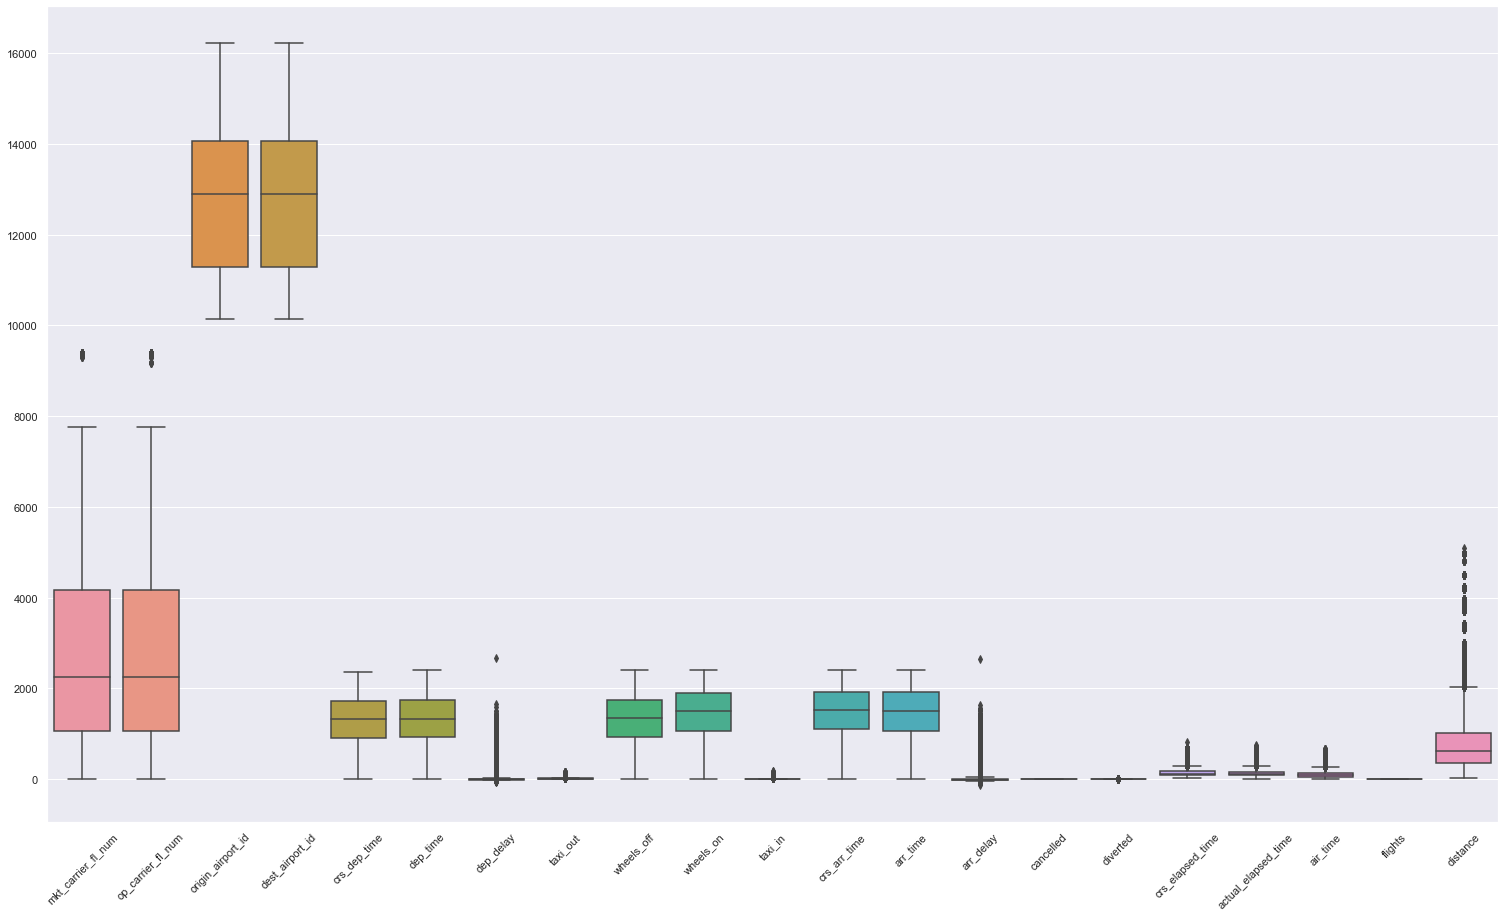

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(26,15)})
ax = sns.boxplot(data = df)
plt.xticks(rotation=45)
plt.show()

In [9]:
# Removing redundant columns and turning values into correct data types
df = df.drop('mkt_carrier_fl_num', axis = 1)

In [10]:
df[['op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id']] = df[['op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id']].astype('str')
df['fl_date'] = pd.to_datetime(df['fl_date'])
df.dtypes

fl_date                datetime64[ns]
mkt_unique_carrier             object
branded_code_share             object
mkt_carrier                    object
op_unique_carrier              object
tail_num                       object
op_carrier_fl_num              object
origin_airport_id              object
origin                         object
origin_city_name               object
dest_airport_id                object
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled                       int64
diverted                        int64
dup                            object
crs_elapsed_

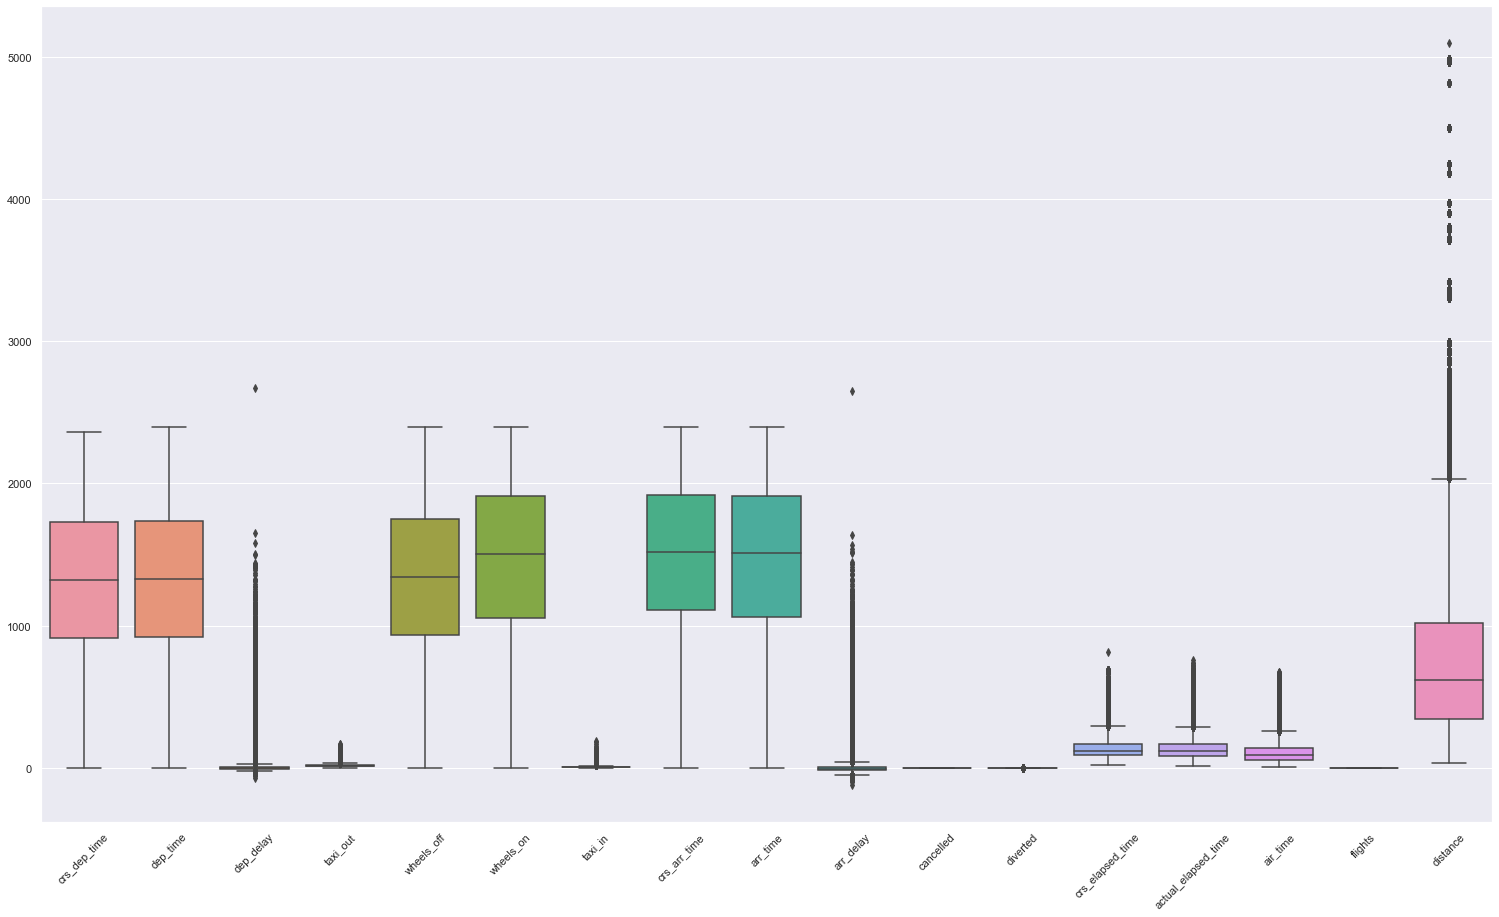

In [11]:
final_columns = df.columns.tolist()
sns.set(rc = {'figure.figsize':(26,15)})
ax = sns.boxplot(data = df)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

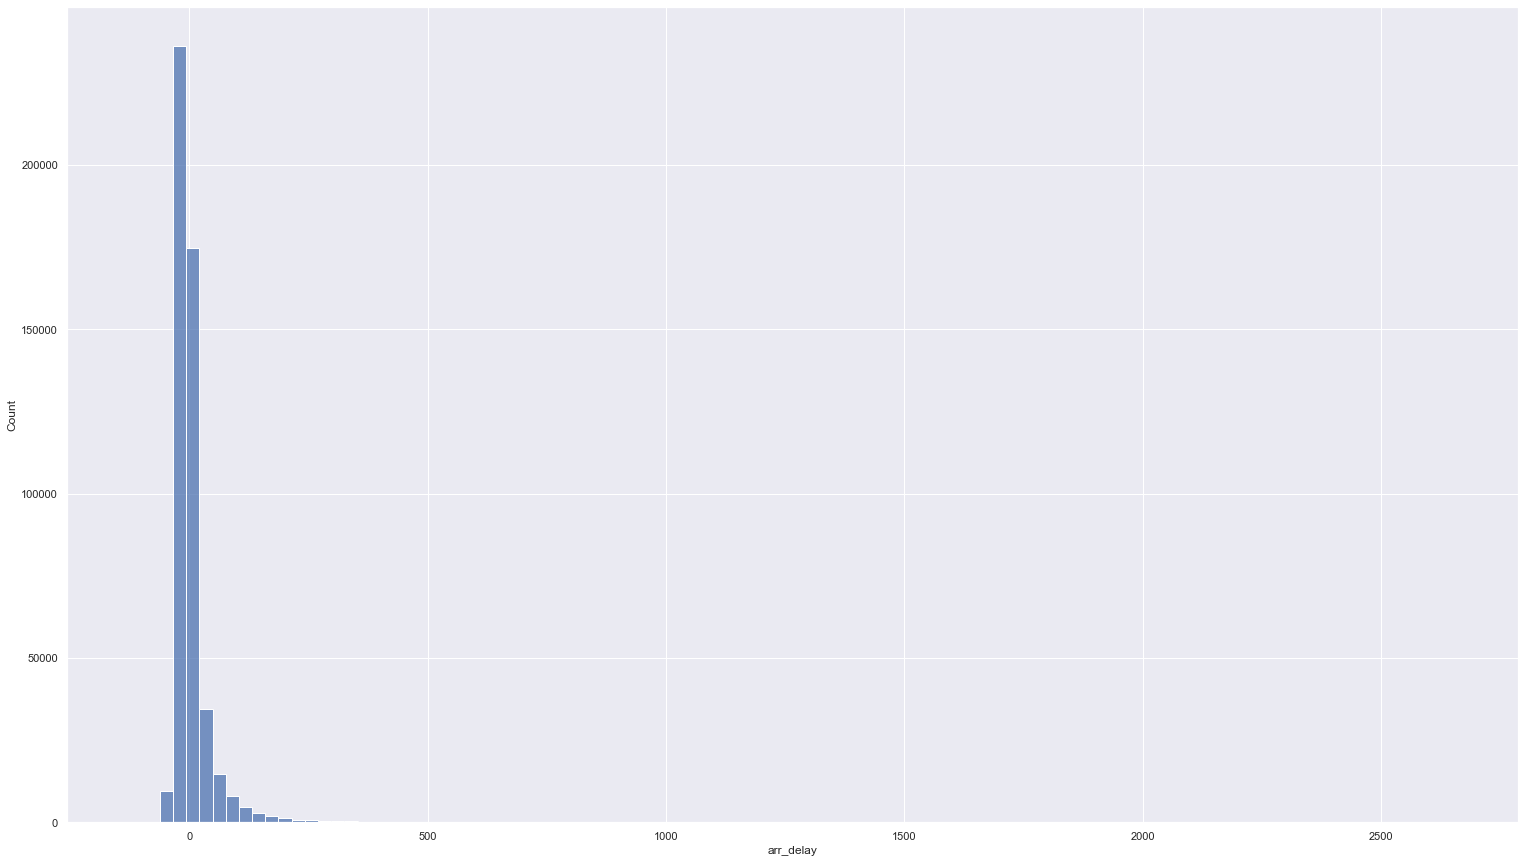

In [12]:
data = df['arr_delay']
sns.histplot(data = data, bins = 100)

In [13]:
data.mean()

3.9573244084631827

In [14]:
# Dropping outliers
df = df.drop(df[df['arr_delay'] > 1000].index)
data = df['arr_delay']

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

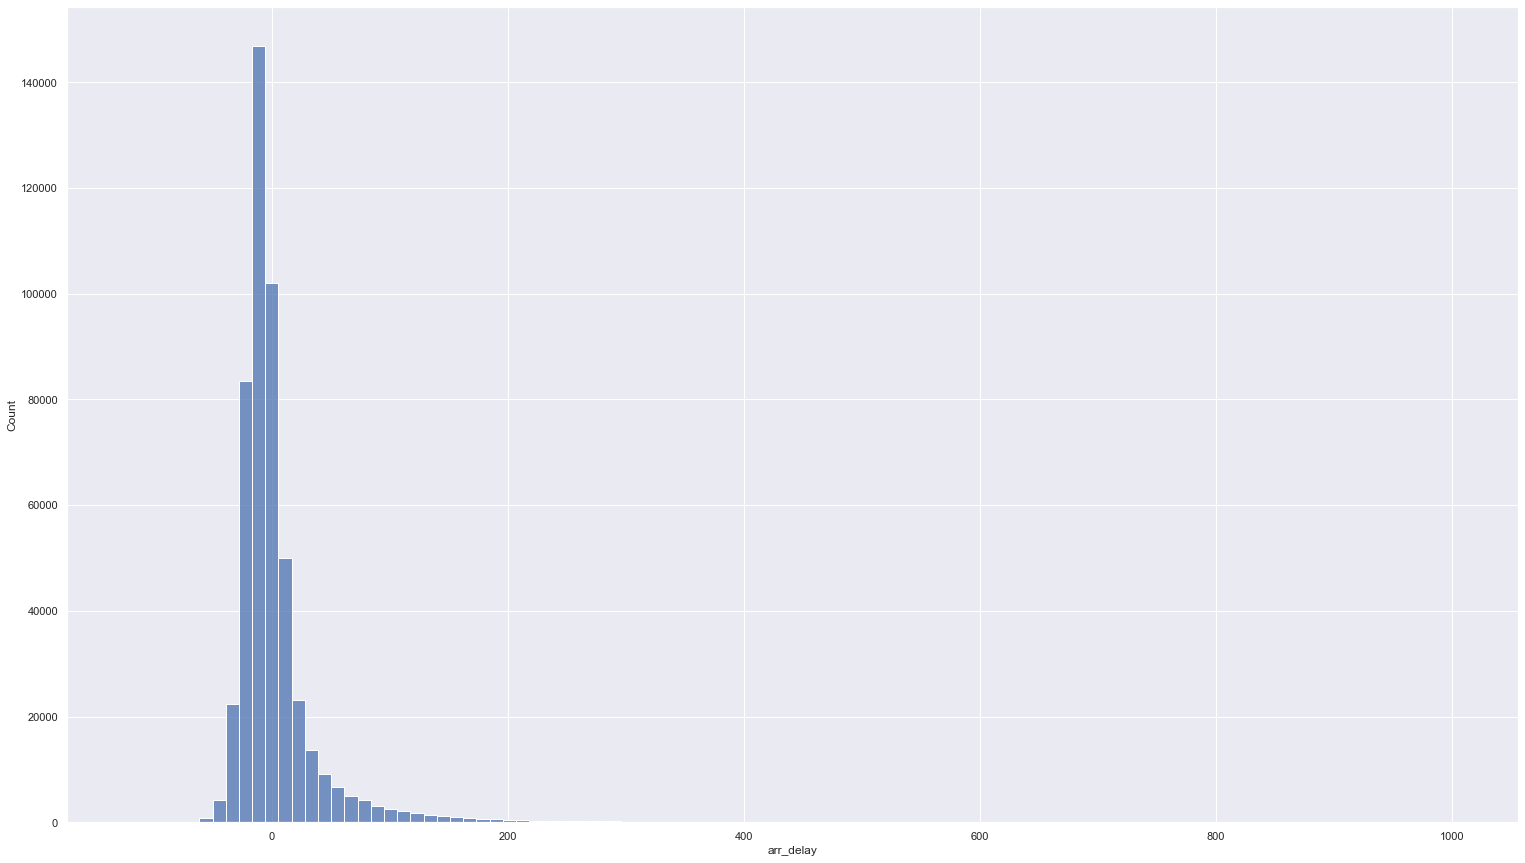

In [15]:
sns.histplot(data = data, bins = 100)

In [16]:
df.shape

(491229, 31)

In [17]:
df.dtypes == object

fl_date                False
mkt_unique_carrier      True
branded_code_share      True
mkt_carrier             True
op_unique_carrier       True
tail_num                True
op_carrier_fl_num       True
origin_airport_id       True
origin                  True
origin_city_name        True
dest_airport_id         True
dest                    True
dest_city_name          True
crs_dep_time           False
dep_time               False
dep_delay              False
taxi_out               False
wheels_off             False
wheels_on              False
taxi_in                False
crs_arr_time           False
arr_time               False
arr_delay              False
cancelled              False
diverted               False
dup                     True
crs_elapsed_time       False
actual_elapsed_time    False
air_time               False
flights                False
distance               False
dtype: bool

In [18]:
df = df.drop(['mkt_carrier', 'origin', 'dest'], axis = 1)

In [19]:
final_columns = df.columns.tolist()
categorical_col = df.dtypes[final_columns][df.dtypes[final_columns] == object].index.tolist()
df[categorical_col].head(30)

,mkt_unique_carrier,branded_code_share,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,dup
9,AA,AA_CODESHARE,YV,N908FJ,5948,14730,"Louisville, KY",11298,"Dallas/Fort Worth, TX",N
11,NK,NK,NK,N602NK,395,14100,"Philadelphia, PA",12889,"Las Vegas, NV",N
12,NK,NK,NK,N602NK,396,12889,"Las Vegas, NV",14100,"Philadelphia, PA",N
13,NK,NK,NK,N507NK,403,10397,"Atlanta, GA",11697,"Fort Lauderdale, FL",N
14,NK,NK,NK,N507NK,403,12892,"Los Angeles, CA",10397,"Atlanta, GA",N
15,NK,NK,NK,N512NK,404,10397,"Atlanta, GA",12892,"Los Angeles, CA",N
16,NK,NK,NK,N512NK,404,11697,"Fort Lauderdale, FL",10397,"Atlanta, GA",N
17,NK,NK,NK,N608NK,405,13204,"Orlando, FL",11298,"Dallas/Fort Worth, TX",N
18,NK,NK,NK,N627NK,406,15304,"Tampa, FL",10529,"Hartford, CT",N
19,NK,NK,NK,N670NK,407,13204,"Orlando, FL",11298,"Dallas/Fort Worth, TX",N


# 1. Test the hypothesis that the delay is from a normal distribution and that the mean of the delay is 0

Without transformations the data is not from a normal distribution

C:\Users\JDPayne\AppData\Local\Temp/ipykernel_7008/358692645.py:5: RuntimeWarning: divide by zero encountered in log
  data = np.log(data)
C:\Users\JDPayne\AppData\Local\Temp/ipykernel_7008/358692645.py:5: RuntimeWarning: invalid value encountered in log
  data = np.log(data)


<AxesSubplot:ylabel='Count'>

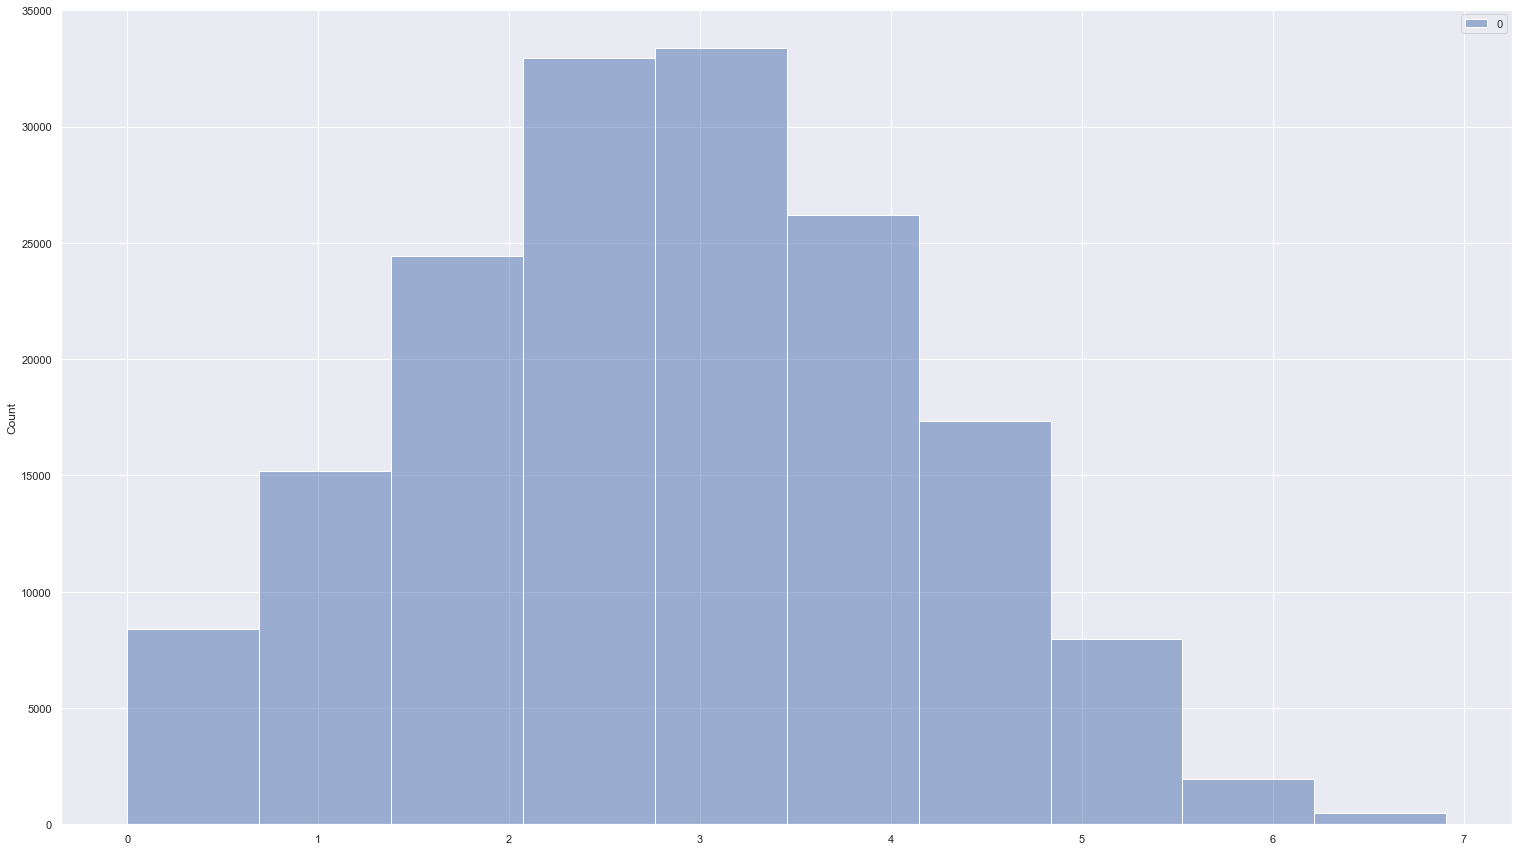

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data = df['arr_delay'].values.reshape(-1,1)
Std_scaler = StandardScaler()
MinMax_scaler = MinMaxScaler()
data = np.log(data)

sns.histplot(data = data, bins = 10)


<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

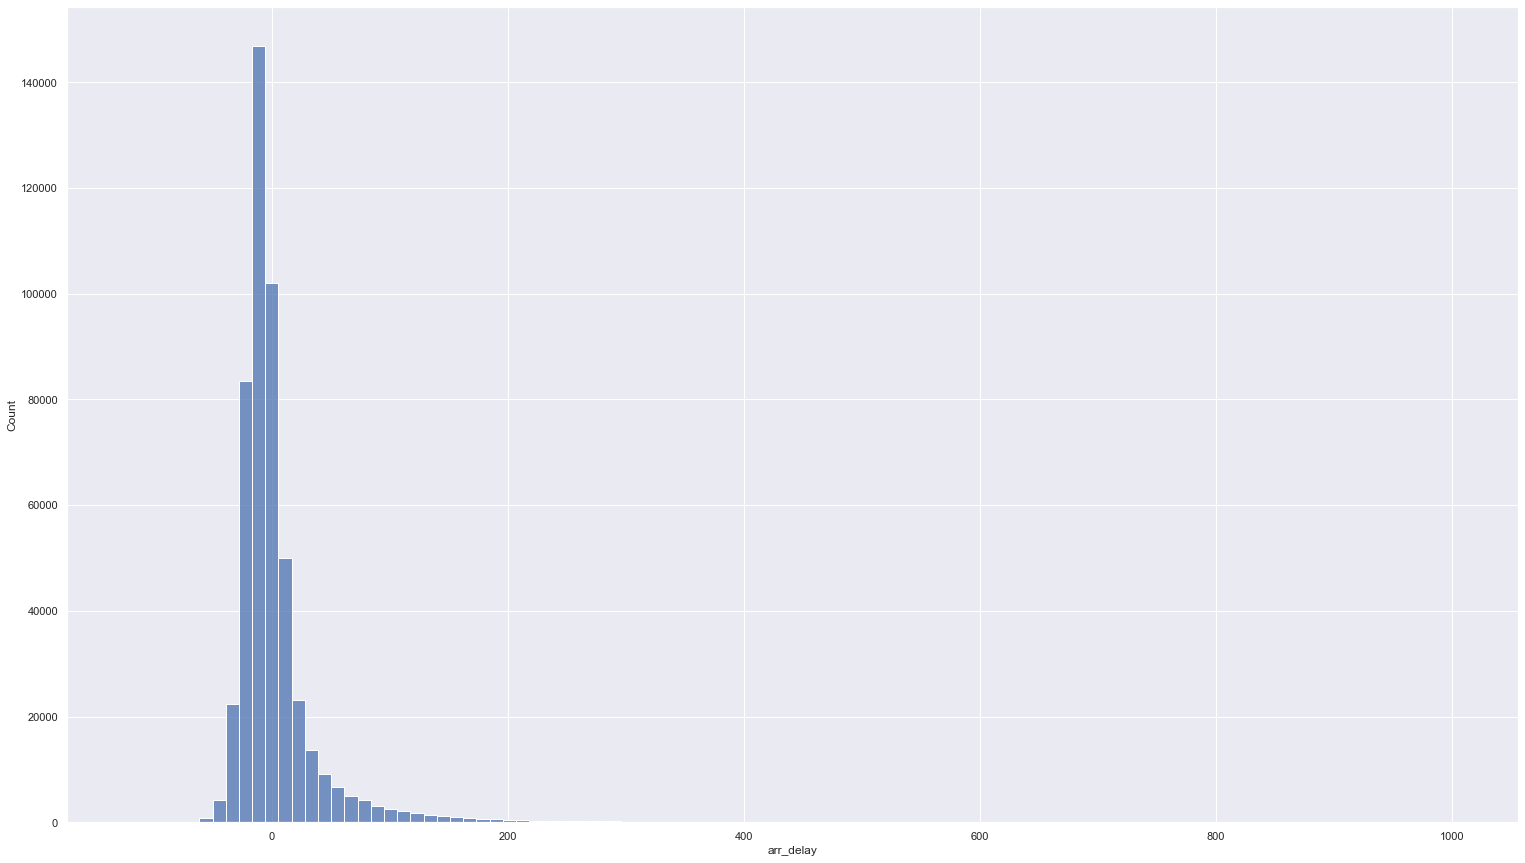

In [21]:
delay_plot = df['arr_delay']
sns.histplot(data = delay_plot, bins = 100)

# 2. Is average/median monthly delay different during the year?

February and March have the highest delay means while december and april have the highest medians

The increase in the median is probably because of the holidays where december is the christmas season and april is the end of most college semesters

The increase in the mean is probably due to the changes in weather during february and march break

In [22]:
december = (df['fl_date'] > '2018-12-01') & (df['fl_date'] <='2018-12-31')
january = (df['fl_date'] > '2019-01-01') & (df['fl_date'] <='2019-01-31')
february = (df['fl_date'] > '2019-02-01') & (df['fl_date'] <='2019-02-28')
march = (df['fl_date'] > '2019-03-01') & (df['fl_date'] <='2019-03-31')
april = (df['fl_date'] > '2019-04-01') & (df['fl_date'] <='2019-04-30')
months = [december, january, february, march, april]

In [23]:
means = []
medians = []
for month in months:
    temp = df[month]['arr_delay'].mean()
    means.append(temp)
    temp = df[month]['arr_delay'].median()
    medians.append(temp)
months_str = ['december', 'january', 'february', 'march', 'april']
months_df = pd.DataFrame(zip(months_str,means,medians), columns = ['Month','Delay_mean', 'Delay_median']).set_index('Month')
months_df

,Delay_mean,Delay_median
Month,,
december,1.179531,-7.0
january,1.455952,-7.0
february,4.979049,-7.0
march,3.269125,-7.0
april,1.641417,-8.0


# 3. Does the weather affect the delay?

I will be using the most central state of the 4 main regions of the US to sample the weather.

These will be the following
* Utah will be used for the West
* Iowa will be used for the Midwest
* Mississippi will be used for the South
* New York will be used for the NorthEast

The first step will be to import the requests library and see if we can get a response from the https://www.worldweatheronline.com/ API

In [24]:
import requests as re
url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=4a328e03abe24e6484b144126220407'
res = re.get(url)
res.status_code

200

Now that we have a response we will make a list of cities we are interested in and convert our Datetime column into a list of unique strings and create a function that will call the API

In [25]:
Central_cities = ['New+York', 'Jackson', 'Des+Moines', 'Salt+Lake+City']
Flight_dates = df['fl_date']
Flight_dates = Flight_dates.dt.strftime('%Y-%m-%d').tolist()
temp = np.array(Flight_dates)
Flight_dates = np.unique(temp)

In [26]:
def api_call(City, date):
    
    '''
    This function takes a string value City formatted as 'New+York' if the name has multiple words and a date formatted as a string.
    
    This function will return a dictionary of hourly weather reports from 0 to 21hrs based on the City and Date input to the parameters.
    It will also return the specific date and city originally input
    '''
    
    
    api_key = 
    url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'
    params_dict = {
        'q' : City,
        'date' : date,
        'format' : 'json',
        'key' : 
    }
    
    header_dict = {
        'accept' : 'application/JSON'
    }
    
    r = re.get(url, headers = header_dict, params = params_dict).json()
    hourly_data = r['data']['weather'][0]['hourly']
    
    hours = [0,3,6,9,12,15,18,21]
    weather = []
       
    hourly_data = r['data']['weather'][0]['hourly']
    for item in hourly_data:
        weather.append(item['weatherDesc'][0]['value'])
        
    hourly_weather = dict(zip(hours, weather))
    city = r['data']['request'][0]['query']
    date = r['data']['weather'][0]['date']
    
    return hourly_weather, city, date

#### The next step will be to call the API multiple times with our dates and cities of interest and append the results into a dictionary

In [27]:
List_of_hourly_weathers = []    

for date in Flight_dates:    
    for City in Central_cities:
        hourly_weather = api_call(City, date)
        List_of_hourly_weathers.append(hourly_weather)
        
List_of_hourly_weathers

[({0: 'Clear',
   3: 'Clear',
   6: 'Sunny',
   9: 'Partly cloudy',
   12: 'Sunny',
   15: 'Cloudy',
   18: 'Light drizzle',
   21: 'Light rain'},
  'New York, United States of America',
  '2018-12-01'),
 ({0: 'Light drizzle',
   3: 'Light rain',
   6: 'Light rain',
   9: 'Light rain',
   12: 'Moderate rain',
   15: 'Moderate rain at times',
   18: 'Heavy rain at times',
   21: 'Moderate or heavy rain shower'},
  'Jacksonville, United States of America',
  '2018-12-01'),
 ({0: 'Light drizzle',
   3: 'Overcast',
   6: 'Light drizzle',
   9: 'Moderate or heavy sleet',
   12: 'Heavy rain',
   15: 'Light drizzle',
   18: 'Overcast',
   21: 'Moderate rain'},
  'Des Moines, United States of America',
  '2018-12-01'),
 ({0: 'Partly cloudy',
   3: 'Moderate or heavy snow showers',
   6: 'Partly cloudy',
   9: 'Patchy light snow',
   12: 'Partly cloudy',
   15: 'Patchy light snow',
   18: 'Partly cloudy',
   21: 'Patchy heavy snow'},
  'Salt Lake City, United States of America',
  '2018-12-01')

#### Now that we have our weather information we will separate the dest_city_name column in the main df into 2 separate columns and group the states by the regions West, Midwest, South and Northeast

In [28]:
df[['City', 'State']] = df['dest_city_name'].str.split(pat= ',', expand = True)
df[['City', 'State']] = df[['City', 'State']].astype('str')
df

,fl_date,mkt_unique_carrier,branded_code_share,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,...,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,City,State
9,2018-12-01,AA,AA_CODESHARE,YV,N908FJ,5948,14730,"Louisville, KY",11298,"Dallas/Fort Worth, TX",...,0,0,N,146,144.0,123.0,1,733,Dallas/Fort Worth,TX
11,2018-12-01,NK,NK,NK,N602NK,395,14100,"Philadelphia, PA",12889,"Las Vegas, NV",...,0,0,N,359,334.0,313.0,1,2176,Las Vegas,NV
12,2018-12-01,NK,NK,NK,N602NK,396,12889,"Las Vegas, NV",14100,"Philadelphia, PA",...,0,0,N,285,289.0,245.0,1,2176,Philadelphia,PA
13,2018-12-01,NK,NK,NK,N507NK,403,10397,"Atlanta, GA",11697,"Fort Lauderdale, FL",...,0,0,N,111,99.0,84.0,1,581,Fort Lauderdale,FL
14,2018-12-01,NK,NK,NK,N507NK,403,12892,"Los Angeles, CA",10397,"Atlanta, GA",...,0,0,N,259,228.0,209.0,1,1947,Atlanta,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2019-04-19,UA,UA_CODESHARE,AX,N11113,4744,11292,"Denver, CO",15016,"St. Louis, MO",...,0,0,N,125,128.0,107.0,1,770,St. Louis,MO
49996,2019-04-19,UA,UA_CODESHARE,AX,N21129,4743,11637,"Fargo, ND",13930,"Chicago, IL",...,0,0,N,130,127.0,82.0,1,557,Chicago,IL
49997,2019-04-19,UA,UA_CODESHARE,AX,N846HK,4742,12389,"Williston, ND",11292,"Denver, CO",...,0,0,N,124,100.0,79.0,1,576,Denver,CO
49998,2019-04-19,UA,UA_CODESHARE,AX,N11121,4741,12389,"Williston, ND",11292,"Denver, CO",...,0,0,N,135,114.0,79.0,1,576,Denver,CO


In [105]:
West = [' WA', ' OR', ' ID', ' MT', ' WY', ' CO', ' NM', ' AZ', ' UT', ' NV', ' CA']
Midwest = [' ND',' SD', ' NE', ' KS', ' MN', ' IA', ' MO', ' WI', ' IL', ' IN', ' OH', ' MI']
South =  [' TX', ' OK', ' AR', ' LA', ' MS', ' AL', ' TN', ' VA', ' GA', ' KY', ' FL', ' SC', ' NC', ' WV', ' DC', ' MD', ' DE']
Northeast = [' PA', ' NY', ' NJ', ' CT', ' MA', ' RI', ' VT', ' NH', ' ME']

#Checking total of mainland states + DC
total = len(West) + len(Midwest) + len(South) + len(Northeast)
total

49

In [106]:
df['Region'] = ''
df

,fl_date,mkt_unique_carrier,branded_code_share,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,...,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,City,State,Region,Weather
9,2018-12-01,AA,AA_CODESHARE,YV,N908FJ,5948,14730,"Louisville, KY",11298,"Dallas/Fort Worth, TX",...,N,146,144.0,123.0,1,733,Dallas/Fort Worth,TX,,Moderate rain
11,2018-12-01,NK,NK,NK,N602NK,395,14100,"Philadelphia, PA",12889,"Las Vegas, NV",...,N,359,334.0,313.0,1,2176,Las Vegas,NV,,Partly cloudy
12,2018-12-01,NK,NK,NK,N602NK,396,12889,"Las Vegas, NV",14100,"Philadelphia, PA",...,N,285,289.0,245.0,1,2176,Philadelphia,PA,,Sunny
13,2018-12-01,NK,NK,NK,N507NK,403,10397,"Atlanta, GA",11697,"Fort Lauderdale, FL",...,N,111,99.0,84.0,1,581,Fort Lauderdale,FL,,Moderate rain
14,2018-12-01,NK,NK,NK,N507NK,403,12892,"Los Angeles, CA",10397,"Atlanta, GA",...,N,259,228.0,209.0,1,1947,Atlanta,GA,,Moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2019-04-19,UA,UA_CODESHARE,AX,N11113,4744,11292,"Denver, CO",15016,"St. Louis, MO",...,N,125,128.0,107.0,1,770,St. Louis,MO,,Sunny
49996,2019-04-19,UA,UA_CODESHARE,AX,N21129,4743,11637,"Fargo, ND",13930,"Chicago, IL",...,N,130,127.0,82.0,1,557,Chicago,IL,,Sunny
49997,2019-04-19,UA,UA_CODESHARE,AX,N846HK,4742,12389,"Williston, ND",11292,"Denver, CO",...,N,124,100.0,79.0,1,576,Denver,CO,,Sunny
49998,2019-04-19,UA,UA_CODESHARE,AX,N11121,4741,12389,"Williston, ND",11292,"Denver, CO",...,N,135,114.0,79.0,1,576,Denver,CO,,Sunny


In [107]:
df.loc[df['State'].isin(South), ['Region']] = 'South'
df.loc[df['State'].isin(Northeast), ['Region']] = 'NorthEast'
df.loc[df['State'].isin(West), ['Region']] = 'West'
df.loc[df['State'].isin(Midwest), ['Region']] = 'MidWest'
df

,fl_date,mkt_unique_carrier,branded_code_share,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,...,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,City,State,Region,Weather
9,2018-12-01,AA,AA_CODESHARE,YV,N908FJ,5948,14730,"Louisville, KY",11298,"Dallas/Fort Worth, TX",...,N,146,144.0,123.0,1,733,Dallas/Fort Worth,TX,South,Moderate rain
11,2018-12-01,NK,NK,NK,N602NK,395,14100,"Philadelphia, PA",12889,"Las Vegas, NV",...,N,359,334.0,313.0,1,2176,Las Vegas,NV,West,Partly cloudy
12,2018-12-01,NK,NK,NK,N602NK,396,12889,"Las Vegas, NV",14100,"Philadelphia, PA",...,N,285,289.0,245.0,1,2176,Philadelphia,PA,NorthEast,Sunny
13,2018-12-01,NK,NK,NK,N507NK,403,10397,"Atlanta, GA",11697,"Fort Lauderdale, FL",...,N,111,99.0,84.0,1,581,Fort Lauderdale,FL,South,Moderate rain
14,2018-12-01,NK,NK,NK,N507NK,403,12892,"Los Angeles, CA",10397,"Atlanta, GA",...,N,259,228.0,209.0,1,1947,Atlanta,GA,South,Moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2019-04-19,UA,UA_CODESHARE,AX,N11113,4744,11292,"Denver, CO",15016,"St. Louis, MO",...,N,125,128.0,107.0,1,770,St. Louis,MO,MidWest,Sunny
49996,2019-04-19,UA,UA_CODESHARE,AX,N21129,4743,11637,"Fargo, ND",13930,"Chicago, IL",...,N,130,127.0,82.0,1,557,Chicago,IL,MidWest,Sunny
49997,2019-04-19,UA,UA_CODESHARE,AX,N846HK,4742,12389,"Williston, ND",11292,"Denver, CO",...,N,124,100.0,79.0,1,576,Denver,CO,West,Sunny
49998,2019-04-19,UA,UA_CODESHARE,AX,N11121,4741,12389,"Williston, ND",11292,"Denver, CO",...,N,135,114.0,79.0,1,576,Denver,CO,West,Sunny


#### Lets create a copy of our api response so that we can put it into our Dataframe with the proper format

In [108]:
#Replace the city names with the regions i defined earlier
import copy
Final_weather_report = copy.deepcopy(List_of_hourly_weathers)
Final_weather_report

[({0: 'Clear',
   3: 'Clear',
   6: 'Sunny',
   9: 'Partly cloudy',
   12: 'Sunny',
   15: 'Cloudy',
   18: 'Light drizzle',
   21: 'Light rain'},
  'New York, United States of America',
  '2018-12-01'),
 ({0: 'Light drizzle',
   3: 'Light rain',
   6: 'Light rain',
   9: 'Light rain',
   12: 'Moderate rain',
   15: 'Moderate rain at times',
   18: 'Heavy rain at times',
   21: 'Moderate or heavy rain shower'},
  'Jacksonville, United States of America',
  '2018-12-01'),
 ({0: 'Light drizzle',
   3: 'Overcast',
   6: 'Light drizzle',
   9: 'Moderate or heavy sleet',
   12: 'Heavy rain',
   15: 'Light drizzle',
   18: 'Overcast',
   21: 'Moderate rain'},
  'Des Moines, United States of America',
  '2018-12-01'),
 ({0: 'Partly cloudy',
   3: 'Moderate or heavy snow showers',
   6: 'Partly cloudy',
   9: 'Patchy light snow',
   12: 'Partly cloudy',
   15: 'Patchy light snow',
   18: 'Partly cloudy',
   21: 'Patchy heavy snow'},
  'Salt Lake City, United States of America',
  '2018-12-01')

In [121]:
# Changing the name of the cities to the regions i described at the start and putting them into a new list with the data and weather

report = []
for i in range(len(Final_weather_report)):
    temp = []
    Final_weather_report[i] = list(Final_weather_report[i])
    if Final_weather_report[i][1] == 'New York, United States of America':
        temp.append('NorthEast')
    elif Final_weather_report[i][1] == 'Jacksonville, United States of America':
        temp.append('South')
    elif Final_weather_report[i][1] == 'Des Moines, United States of America':
        temp.append('MidWest')
    elif Final_weather_report[i][1] == 'Salt Lake City, United States of America':
        temp.append('West')   
    temp.append(Final_weather_report[i][2])
    temp.append(Final_weather_report[i][0][12])
    report.append(temp)

#Final_weather_report
report

[['NorthEast', '2018-12-01', 'Sunny'],
 ['South', '2018-12-01', 'Moderate rain'],
 ['MidWest', '2018-12-01', 'Heavy rain'],
 ['West', '2018-12-01', 'Partly cloudy'],
 ['NorthEast', '2018-12-02', 'Moderate rain'],
 ['South', '2018-12-02', 'Thundery outbreaks possible'],
 ['MidWest', '2018-12-02', 'Overcast'],
 ['West', '2018-12-02', 'Partly cloudy'],
 ['NorthEast', '2018-12-03', 'Sunny'],
 ['South', '2018-12-03', 'Light rain shower'],
 ['MidWest', '2018-12-03', 'Moderate snow'],
 ['West', '2018-12-03', 'Partly cloudy'],
 ['NorthEast', '2018-12-17', 'Partly cloudy'],
 ['South', '2018-12-17', 'Partly cloudy'],
 ['MidWest', '2018-12-17', 'Sunny'],
 ['West', '2018-12-17', 'Partly cloudy'],
 ['NorthEast', '2018-12-18', 'Sunny'],
 ['South', '2018-12-18', 'Sunny'],
 ['MidWest', '2018-12-18', 'Sunny'],
 ['West', '2018-12-18', 'Sunny'],
 ['NorthEast', '2018-12-19', 'Partly cloudy'],
 ['South', '2018-12-19', 'Cloudy'],
 ['MidWest', '2018-12-19', 'Sunny'],
 ['West', '2018-12-19', 'Sunny'],
 ['Nort

In [122]:
# Changing the date column back into string and creating a weather column
df['Weather'] = ''
df['fl_date'] = df['fl_date'].astype(str)

#### Now that everything is formatted properly I will loop through my list that includes region, date and weather and find rows that have a matching region and data value. For every match I will then input the corresponding weather information into the weather column i previously created

In [123]:
for i in range(len(report)):
    df.loc[(df['fl_date'].isin(report[i])) & (df['Region'].isin(report[i])), ['Weather']] = report[i][2]

#### Dropping territories after I found out I had empty weather reports

In [128]:
# Need to drop the empty rows because they're not domestic flights and i didn't grab API information for them
Territories = ['HI', 'PR', 'AK', 'TT', 'VI']
df['Weather'].value_counts()


Sunny                            175222
Partly cloudy                     76197
Cloudy                            65597
Overcast                          44176
Light rain shower                 27631
Light drizzle                     19684
Patchy light drizzle              16695
Thundery outbreaks possible       12269
Heavy rain                        11809
Moderate rain                      9169
Light rain                         8701
Moderate snow                      5172
Mist                               3843
Moderate or heavy rain shower      1341
Light snow                         1336
Name: Weather, dtype: int64

In [125]:
df=df.mask(df == '')

In [132]:
df['Weather'].isnull().value_counts()

False    478842
True      12387
Name: Weather, dtype: int64

In [133]:
df.dropna(subset = ['Weather'], inplace = True)

In [134]:
df['Weather'].isnull().value_counts()

False    478842
Name: Weather, dtype: int64

#### Finished Dataframe with weather information, now I should group together similar forecasts. Lets create 4 groups called Sunny, Rainy, Cloudy and Snowy. Drizzles will be considered cloudy

In [139]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,...,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,City,State,Region,Weather
9,2018-12-01,AA,AA_CODESHARE,YV,N908FJ,5948,14730,"Louisville, KY",11298,"Dallas/Fort Worth, TX",...,N,146,144.0,123.0,1,733,Dallas/Fort Worth,TX,South,Moderate rain
11,2018-12-01,NK,NK,NK,N602NK,395,14100,"Philadelphia, PA",12889,"Las Vegas, NV",...,N,359,334.0,313.0,1,2176,Las Vegas,NV,West,Partly cloudy
12,2018-12-01,NK,NK,NK,N602NK,396,12889,"Las Vegas, NV",14100,"Philadelphia, PA",...,N,285,289.0,245.0,1,2176,Philadelphia,PA,NorthEast,Sunny
13,2018-12-01,NK,NK,NK,N507NK,403,10397,"Atlanta, GA",11697,"Fort Lauderdale, FL",...,N,111,99.0,84.0,1,581,Fort Lauderdale,FL,South,Moderate rain
14,2018-12-01,NK,NK,NK,N507NK,403,12892,"Los Angeles, CA",10397,"Atlanta, GA",...,N,259,228.0,209.0,1,1947,Atlanta,GA,South,Moderate rain


In [161]:
Rainy = ['Thundery outbreaks possible', 'Heavy rain', 'Moderate rain', 'Light rain', 'Moderate or heavy rain shower']
Snowy = ['Moderate snow', 'Light snow']
Cloudy = ['Partly cloudy', 'Overcast', 'Mist','Light drizzle','Patchy light drizzle','Light rain shower']

df['Weather'] = df['Weather'].str.strip()

In [162]:
df.loc[df['Weather'].isin(Rainy), ['Weather']] = 'Rainy'
df.loc[df['Weather'].isin(Snowy), ['Weather']] = 'Snowy'
df.loc[df['Weather'].isin(Cloudy), ['Weather']] = 'Cloudy'
df['Weather'].value_counts()


Cloudy    253823
Sunny     175222
Rainy      43289
Snowy       6508
Name: Weather, dtype: int64

#### Now that everything is properly formatted lets see the distribution of the delay for each weather type!

In [218]:
Rain_delay = pd.DataFrame(df['arr_delay'][df['Weather'] == 'Rainy']).reset_index(drop = True)
Rain_delay.columns = ['Rain_delay']
Cloud_delay = pd.DataFrame(df['arr_delay'][df['Weather'] == 'Cloudy']).reset_index(drop = True)
Cloud_delay.columns = ['Cloud_delay']
Sun_delay = pd.DataFrame(df['arr_delay'][df['Weather'] == 'Sunny']).reset_index(drop = True)
Sun_delay.columns = ['Sun_delay']
Snow_delay = pd.DataFrame(df['arr_delay'][df['Weather'] == 'Snowy']).reset_index(drop = True)
Snow_delay.columns = ['Snow_delay']
Weather_df = pd.concat([Rain_delay, Cloud_delay, Sun_delay, Snow_delay], axis=1)

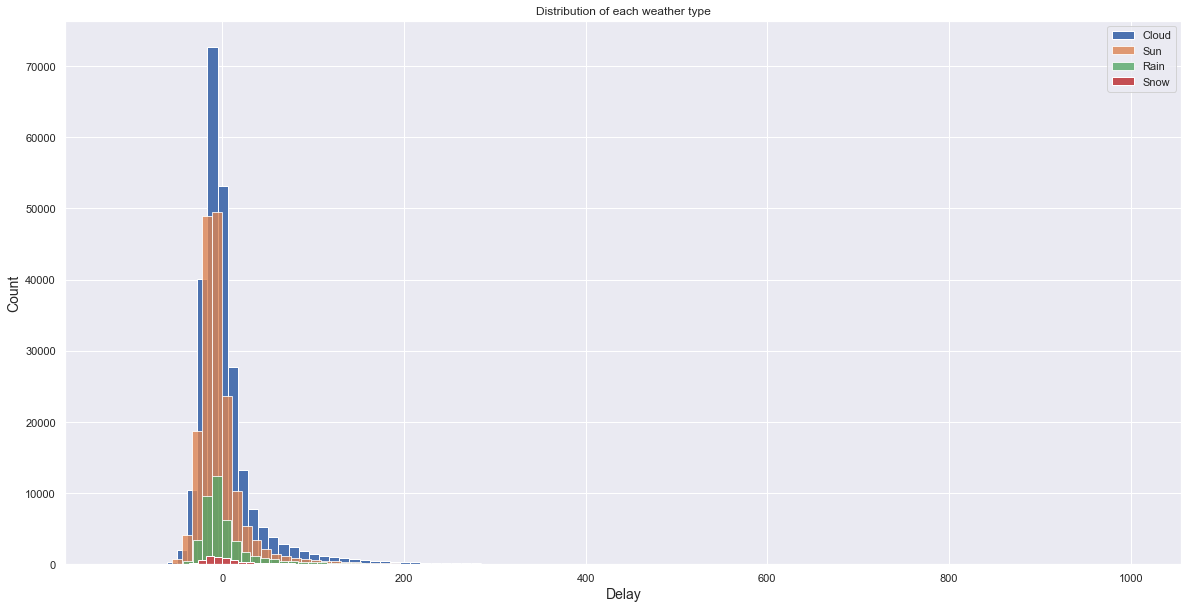

In [222]:
plt.figure(figsize=(20,10))
plt.hist(Cloud_delay, bins=100,  label="Cloud")
plt.hist(Sun_delay, bins=100, alpha = 0.8,  label="Sun")
plt.hist(Rain_delay, bins=100, alpha = 0.8, label="Rain")
plt.hist(Snow_delay, bins=100,  label="Snow")
plt.xlabel("Delay", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution of each weather type")
plt.legend(loc='upper right')
plt.savefig('Weather_histogram_distribution_for_delays.png')
plt.show()

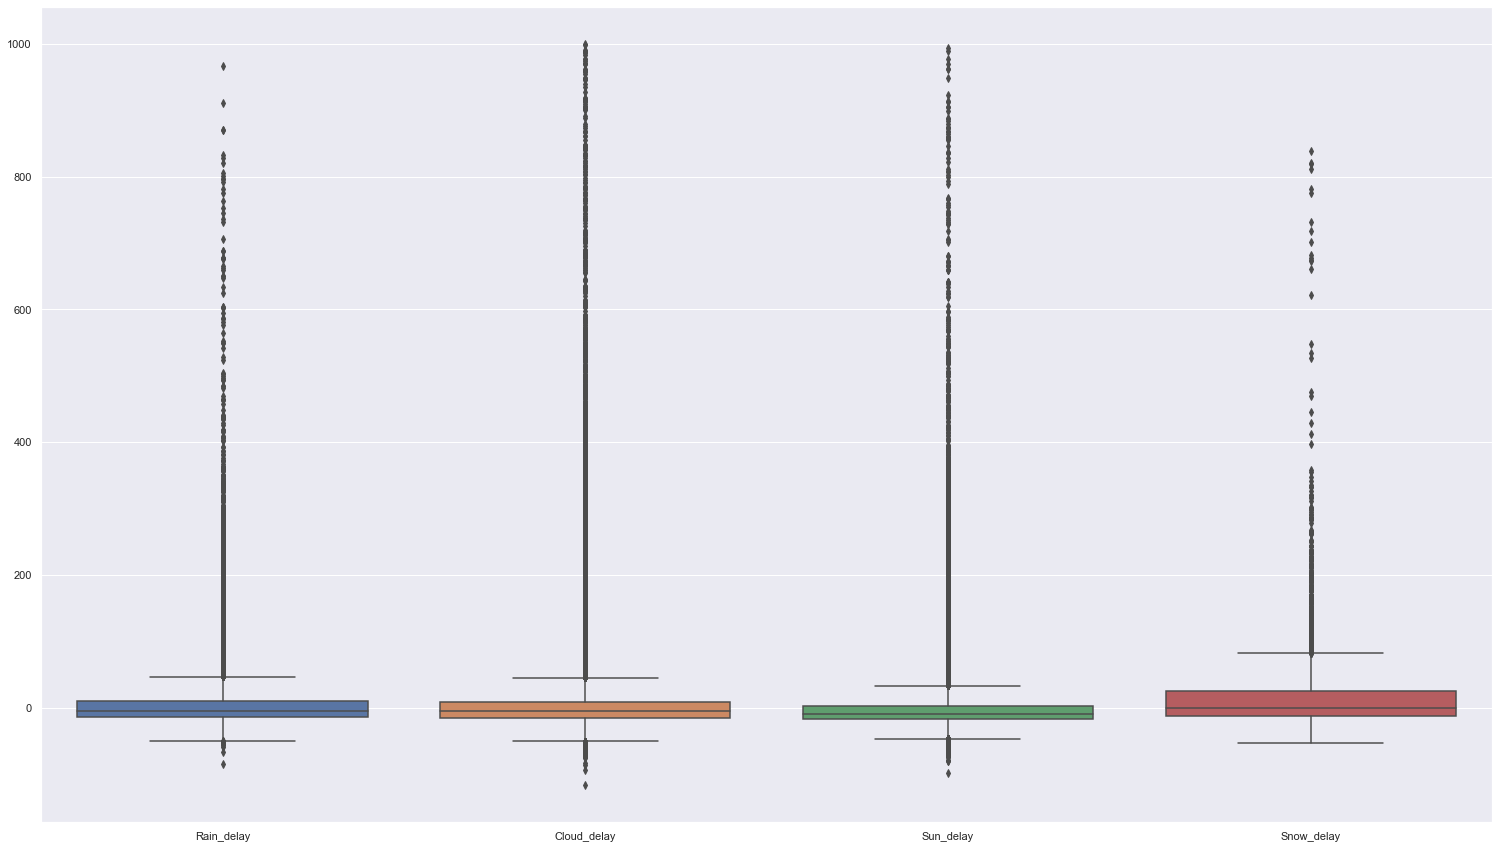

In [223]:
ax = sns.boxplot(data = Weather_df)
plt.savefig('Weather_boxplot_distribution_for_delays')
plt.show()

In [224]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,...,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,City,State,Region,Weather
9,2018-12-01,AA,AA_CODESHARE,YV,N908FJ,5948,14730,"Louisville, KY",11298,"Dallas/Fort Worth, TX",...,N,146,144.0,123.0,1,733,Dallas/Fort Worth,TX,South,Rainy
11,2018-12-01,NK,NK,NK,N602NK,395,14100,"Philadelphia, PA",12889,"Las Vegas, NV",...,N,359,334.0,313.0,1,2176,Las Vegas,NV,West,Cloudy
12,2018-12-01,NK,NK,NK,N602NK,396,12889,"Las Vegas, NV",14100,"Philadelphia, PA",...,N,285,289.0,245.0,1,2176,Philadelphia,PA,NorthEast,Sunny
13,2018-12-01,NK,NK,NK,N507NK,403,10397,"Atlanta, GA",11697,"Fort Lauderdale, FL",...,N,111,99.0,84.0,1,581,Fort Lauderdale,FL,South,Rainy
14,2018-12-01,NK,NK,NK,N507NK,403,12892,"Los Angeles, CA",10397,"Atlanta, GA",...,N,259,228.0,209.0,1,1947,Atlanta,GA,South,Rainy


In [230]:
df.to_csv('Final_Data_Exploration_df.csv')